In [51]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV, cross_val_predict
from sklearn.linear_model import LogisticRegression, SGDClassifier 
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.metrics import classification_report, r2_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, precision_recall_curve, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline, Pipeline

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
df = fetch_openml('mnist_784', version = 1)


In [22]:
X, y = df['data'].values, df['target'].values

In [23]:
print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


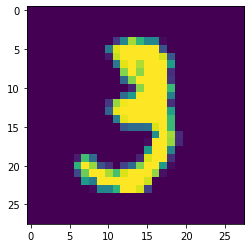

In [26]:
some_digit=X[10]
some_digit_image=some_digit.reshape(28,28)
plt.imshow(some_digit_image)

(-0.5, 27.5, 27.5, -0.5)

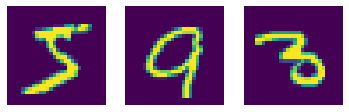

In [35]:
# showing different images in the dataset. we will try to predict them later on.
digit1 = X[0]
digit_image = digit1.reshape(28, 28)
plt.subplot(131)
plt.imshow(digit_image)
plt.axis('off')

digit2 = X[3000]
digit_image = digit2.reshape(28, 28)
plt.subplot(132)
plt.imshow(digit_image)
plt.axis('off')

digit3 = X[30]
digit_image = digit3.reshape(28, 28)
plt.subplot(133)
plt.imshow(digit_image)
plt.axis('off')

In [6]:
# confirming the values abover
y[300], y[3000], y[30]

('8', '9', '3')

In [40]:
# there is a slight issue. the values are in strings. 
# lets convert them to integers
y = y.astype(np.uint8)


### Splitting the Training and Testing sets

In [29]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

### Fitting the model

In this instance, we are going to use the Stochastic Gradient Decent Classifier. Being that the target variable is continous, it is prudent to use linear classifiers by tuning the loss hyperparameter in the SGDClassifier model by setting loss to 'hinge' for SVC and 'log' for logistic regression. We will then assess/compare the model performances using the cross_val_score.  

In [53]:
clf_svc = Pipeline([('scaler',StandardScaler()),('sgd',SGDClassifier(random_state = 42))])
clf_svc.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('sgd', SGDClassifier(random_state=42))])

In [54]:
#predicting the digits using the classisfier
print(clf_svc.predict([digit1]))
print(clf_svc.predict([digit2]))
print(clf_svc.predict([digit3]))

['5']
['9']
['3']


In [58]:
#scores without hyperparameter tuning 
score = cross_val_score(clf_svc, X_train, y_train, cv = 4,
                        scoring = 'accuracy')
score

array([0.89813333, 0.89893333, 0.89446667, 0.90293333])

In [ ]:
# scores with hyperparameter tuning
sgd_clf = Pipeline(steps=[('scaler', StandardScaler()),
                ('sgd',
                 SGDClassifier(alpha=0.0005, l1_ratio=0.30000000000000004,
                               loss='perceptron', n_jobs=-1,
                               penalty='elasticnet', random_state=42))])

sgd_clf.fit(X_train, y_train)


### Hyperparameter Tuning using RandomizedSearchCV

In [55]:
params={'sgd__loss':['hinge','log_loss','perceptron'],
       'sgd__penalty':['l1','l2','elasticnet',None],
       'sgd__alpha':[0.0001,0.0005,0.001],
       'sgd__l1_ratio':np.linspace(0.1,1,num=10),
       'sgd__n_jobs':[-1]}
rand_search = RandomizedSearchCV(clf_svc, params, cv=3, verbose=1)
rand_search.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                             ('sgd',
                                              SGDClassifier(random_state=42))]),
                   param_distributions={'sgd__alpha': [0.0001, 0.0005, 0.001],
                                        'sgd__l1_ratio': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
                                        'sgd__loss': ['hinge', 'log_loss',
                                                      'perceptron'],
                                        'sgd__n_jobs': [-1],
                                        'sgd__penalty': ['l1', 'l2',
                                                         'elasticnet', None]},
                   verbose=1)

In [57]:
rand_search.best_params_

{'sgd__penalty': 'elasticnet',
 'sgd__n_jobs': -1,
 'sgd__loss': 'perceptron',
 'sgd__l1_ratio': 0.30000000000000004,
 'sgd__alpha': 0.0005}

In [60]:
#best estimators
rand_search.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('sgd',
                 SGDClassifier(alpha=0.0005, l1_ratio=0.30000000000000004,
                               loss='perceptron', n_jobs=-1,
                               penalty='elasticnet', random_state=42))])

In [ ]:
# creating a confusion matrix


In [ ]:
# model perfomance on the training set


In [14]:
clf_lr = SGDClassifier(loss = 'log', random_state = 42)
clf_lr.fit(X_train, y_train)

SGDClassifier(loss='log', random_state=42)

In [15]:
# calculating the cross validation score of the 
# logistic regression SGDClassifier

score_lr = cross_val_score(clf_lr, X_train, y_train, 
                           scoring = 'accuracy', cv = 4)

# printing scores
print(f"Accuracy Score : {score}\nMean : {score.mean()}\nStandard Deviation: {score.std()}")


Accuracy Score : [0.8795     0.88853333]
Mean : 0.8840166666666667
Standard Deviation: 0.004516666666666669


In [16]:
y_pred = clf_lr.predict(X_test)
np.array(y_pred)

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

### Predicting if the value is 9

In [32]:
y_train_9=(y_train==9)
y_test_9=(y_test==9)